In [41]:
#Importation des librairies

from pyds import MassFunction
import matplotlib.pyplot as plt


print('=== Création de la distribution de masse ===')
# Utilisation d'une liste de tuples
EGFF = MassFunction([({'FN'}, 0.5), ({'AH'}, 0.3), ({'FN', 'AH'}, 0.2)]) # Experts en gestion des feux de forêt (EGFF)
print('EGFF =', EGFF)
EF = MassFunction([({'FN'}, 0.7), ({'FN', 'AH'}, 0.3)])  # Écologistes des forêts
print('EF =', EF)
OP = MassFunction([({'FN'}, 0.5), ({'AH'}, 0.5)])  # Opinion publique
print('OP =', OP)
EAFF = MassFunction([({'FN', 'AH'}, 0.6), ({'FN', 'AH'}, 0.4)])  # Expert en analyse des feux de forêt
print('EAFF =', EAFF)
RPE = MassFunction()  # Responsables de la protection de l'environnement
RPE[{'AH'}] = 0.6
RPE[{'FN', 'AH'}] = 0.4
print('RPE =', RPE)

=== Création de la distribution de masse ===
EGFF = {{'FN'}:0.5; {'AH'}:0.3; {'AH', 'FN'}:0.2}
EF = {{'FN'}:0.7; {'AH', 'FN'}:0.3}
OP = {{'FN'}:0.5; {'AH'}:0.5}
EAFF = {{'AH', 'FN'}:1.0}
RPE = {{'AH'}:0.6; {'AH', 'FN'}:0.4}


In [42]:
#affichage de croyance et plausibilité pour chaque expert
print('\n=== La croyance et la plausibilite ===')
print('bel_1({FN, AH}) =', EGFF.bel({'FN', 'AH'}))
print('pl_1({FN, AH}) =', EGFF.pl({'FN', 'AH'}))
print('bel_1({FN, AH}) =', EF.bel({'FN'}))
print('pl_1({FN, AH}) =', EF.pl({'FN'}))


=== La croyance et la plausibilite ===
bel_1({FN, AH}) = 1.0
pl_1({FN, AH}) = 1.0
bel_1({FN, AH}) = 0.7
pl_1({FN, AH}) = 1.0


In [43]:

#combinaisons des masses par fusion de Dempster-Shafer
print('\n=== Combinaisons des masses par fusion de Dempster-Shafer ===')
print('Combinaisons des masses EGFF et EF =', EGFF & EF)
print('Combinaisons des masses EGFF et OP =', EGFF & OP)
print('Combinaisons des masses EGFF ET EAFF =', EGFF & EAFF)
print('Combinaisons des masses EGFF ET RPE =', EGFF & RPE)
print('\n=== Combinaisons des masses conjunctive de Dempster-Shafer ===')
print('Combinaisons des masses de EGFF, EAFF, and OP =', EGFF.combine_conjunctive(EAFF, OP))
print('Combinaisons des masses de EF, EAFF, and OP =', EF.combine_conjunctive(EAFF, OP))
comb1 = EGFF & EF
comb2 = RPE & OP
comb3 = EF & comb1
comb4 = comb2 & comb3
print('Combinaisons des masses de EF, EGFF, RPE, and OP =', comb4)


=== Combinaisons des masses par fusion de Dempster-Shafer ===
Combinaisons des masses EGFF et EF = {{'FN'}:0.810126582278481; {'AH'}:0.11392405063291139; {'AH', 'FN'}:0.07594936708860758}
Combinaisons des masses EGFF et OP = {{'FN'}:0.5833333333333334; {'AH'}:0.4166666666666667}
Combinaisons des masses EGFF ET EAFF = {{'FN'}:0.5; {'AH'}:0.3; {'AH', 'FN'}:0.2}
Combinaisons des masses EGFF ET RPE = {{'AH'}:0.6; {'FN'}:0.28571428571428575; {'AH', 'FN'}:0.11428571428571431}

=== Combinaisons des masses conjunctive de Dempster-Shafer ===
Combinaisons des masses de EGFF, EAFF, and OP = {{'FN'}:0.5; {'AH'}:0.3; {'AH', 'FN'}:0.2}
Combinaisons des masses de EF, EAFF, and OP = {{'FN'}:0.7; {'AH', 'FN'}:0.3}
Combinaisons des masses de EF, EGFF, RPE, and OP = {{'FN'}:0.8615384615384615; {'AH'}:0.13846153846153847}


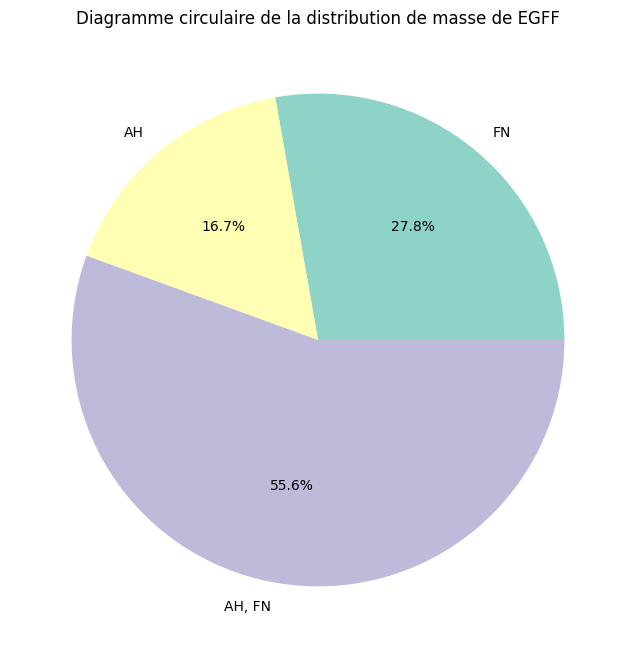

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Utilisez la palette de couleurs seaborn
sns.set_palette("Set3")

# Visualisation des résultats
# Récupérez les résultats de la fusion de masses
result = EGFF

# Obtenez les éléments focaux et leurs valeurs
labels = []  # Liste pour stocker les éléments focaux
values = []  # Liste pour stocker les valeurs associées

for focal_element in result:
    elements = list(focal_element)
    label = ", ".join(elements)  # Convertit le frozenset en une chaîne de caractères
    value = result.bel(focal_element)  # La valeur associée à l'élément focaux
    labels.append(label)
    values.append(value)

# Créez un diagramme circulaire avec seaborn
plt.figure(figsize=(8, 8))  # Réglez la taille du graphique si nécessaire
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title('Diagramme circulaire de la distribution de masse de EGFF')

plt.show()


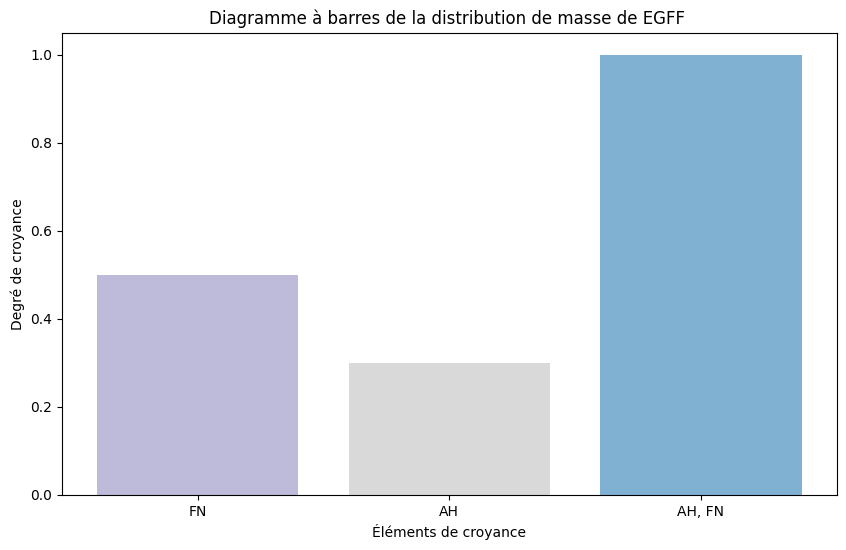

In [45]:
# Créez un diagramme à barres 
colors = plt.cm.Set3([0.2, 0.7, 0.4])
plt.figure(figsize=(10, 6))  # Réglez la taille du graphique si nécessaire
plt.bar(labels, values, color=colors)
plt.title('Diagramme à barres de la distribution de masse de EGFF ')
plt.xlabel('Éléments de croyance')
plt.ylabel('Degré de croyance')
plt.show()


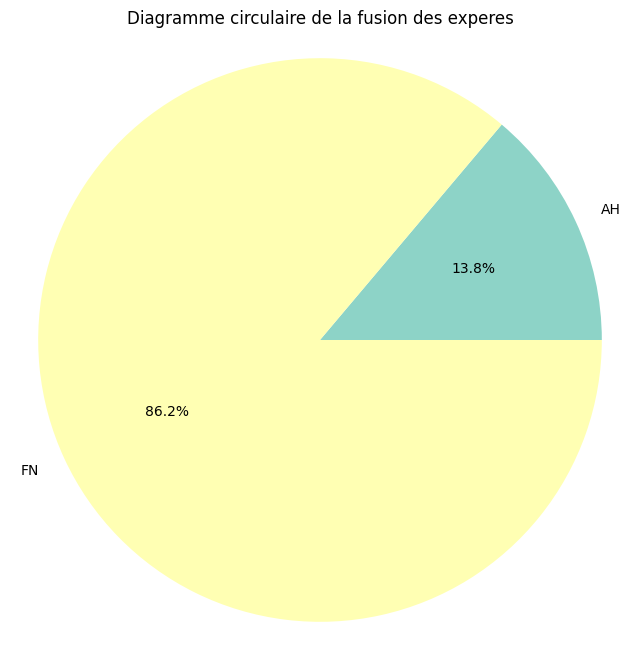

In [46]:
#Resultat de la fusion de tous les experes
result = comb4

# Obtenez les éléments focaux et leurs valeurs
labels = []  # Liste pour stocker les éléments focaux
values = []  # Liste pour stocker les valeurs associées

for focal_element in result:
    elements = list(focal_element)
    label = ", ".join(elements)  # Convertit le frozenset en une chaîne de caractères
    value = result.bel(focal_element)  # La valeur associée à l'élément focaux
    labels.append(label)
    values.append(value)

# Créez un diagramme circulaire avec seaborn
plt.figure(figsize=(8, 8))  # Réglez la taille du graphique si nécessaire
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title('Diagramme circulaire de la fusion des experes')
plt.axis('equal')  # Assurez-vous que le cercle est dessiné correctement
plt.show()

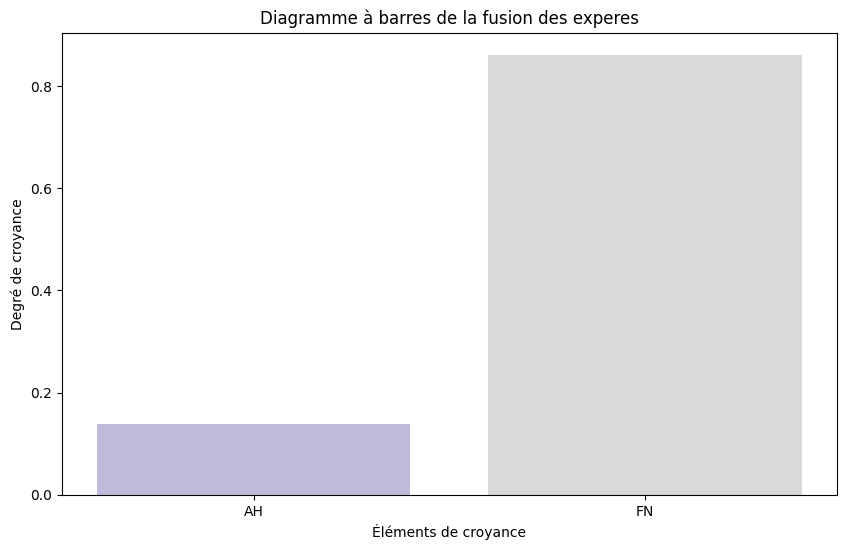

In [47]:
colors = plt.cm.Set3([0.2, 0.7, 0.4])
plt.figure(figsize=(10, 6))  # Réglez la taille du graphique si nécessaire
plt.bar(labels, values, color=colors)
plt.title('Diagramme à barres de la fusion des experes')
plt.xlabel('Éléments de croyance')
plt.ylabel('Degré de croyance')
plt.show()